# 1. Exploratoty data analysis

# 2. 데이터셋

In [1]:
# 3. 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# 4. 데이터 로드


In [2]:
df = pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [3]:
# 위에서 5개 미리보기
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# info 로 데이터 타입, 결측치, 메모리 사용량  정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 결측치

df_null=df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [6]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# 수치데이터 요약

df.describe() 
 #df.describe(include='number') 하면 오류가 난다. 오브젝트가 없어서
    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# 가장 마지막에 있는 outcome은 label 값이기 때문에 제외
# 학습과 예측에 사용할 컬럼을 만들어 준다
# feature_colimns 라는 변수에 담아준다


feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 5. 결측치 시각화
* 값을 요약해 보면 최솟값이 0으로 나오는 값들이 있다
* 0이 나올 수 있는 값도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있다
* 따라서 0인 값을 결측치로 처리하고 시각화

In [9]:
cols = feature_columns[1:]
cols


['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
# 결측치 여부를 나타내는 데이터프레임 만든다
# 0 값을 결측치라 가정하고 정답(label, target)값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null 이라는 데이터 프레임에 담는다.

df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [11]:
df_null.mean()*100  # *100 -> 퍼센트

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

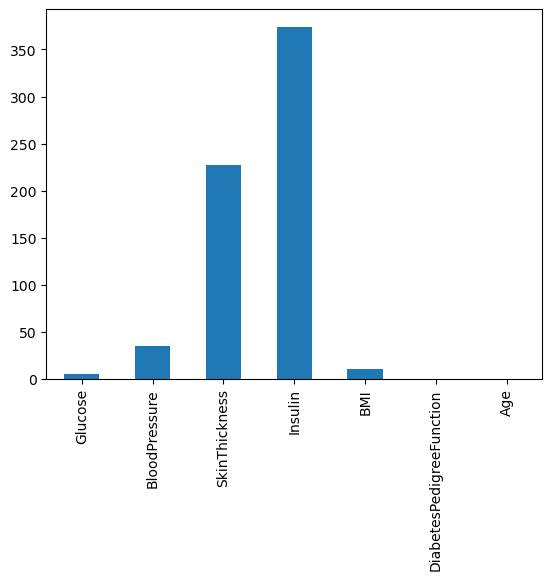

In [79]:
# 결측치의 갯수를 구해 막대 그래프로 시각화

df_null.sum().plot.bar()

<Axes: >

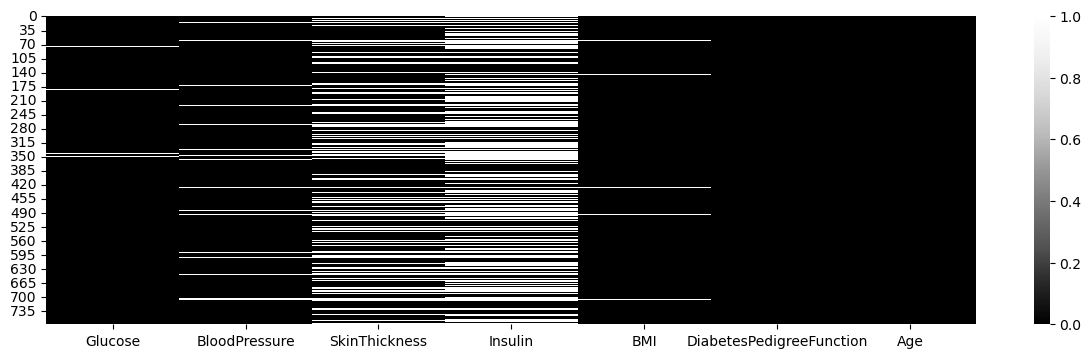

In [13]:
# 결측치를 heatmap 시각화
# 넓게 그려보자
plt.figure(figsize=(15,4))
sns.heatmap(df_null , cmap='Greys_r')
# 결측치만 흰색으로->Greys_r

# 6. 정답값
* target, label이라고 부르기도 한다.

In [14]:
# 정답값인 outcome 의 갯수를 본다

df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
# 정답값인 outcome의 비율을 본다

df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [16]:
# 다른 변수와 함께 본다
# 임신 횟수와 정답값을 비교해 본다
# Pregnancies를 groupby 로 그룹화 해서 outcome에 대한 비율을 구한다
# 결과를 df_po라는 변수에 저장

# df.groupby(['Pregnancies'])['Outcome'].mean()

# 빈도수와 같이 보자
# df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count'])

# column 값으로 배열하자
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po


,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

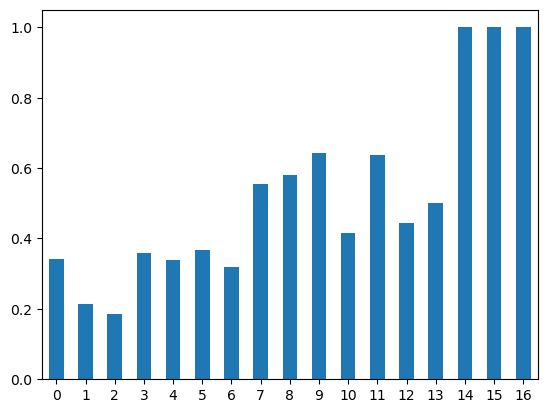

In [17]:
# 임신횟수에 따른 당뇨병 발병 비율

# df_po.plot()
# 비율만 볼래
df_po['mean'].plot.bar(rot=0)
# rot=0 글자세우는거

# 7. countplot

<Axes: xlabel='Outcome', ylabel='count'>

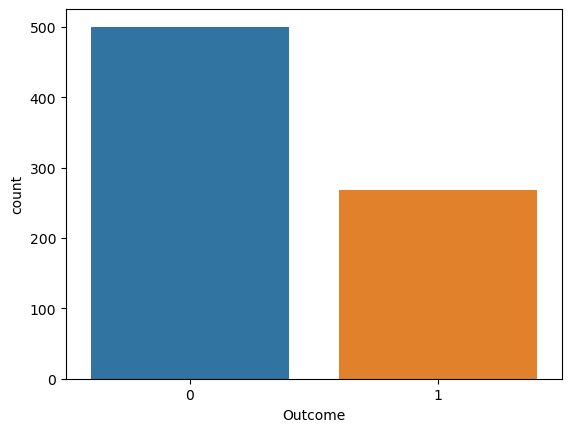

In [18]:
# 위에서 구했던 당뇨병 발병 비율을 구한다
# 당뇨병 발병 빈도수 비교

sns.countplot(data=df, x='Outcome')

<Axes: xlabel='Pregnancies', ylabel='count'>

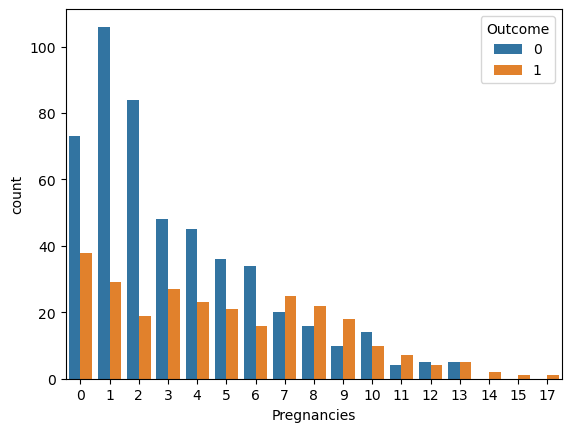

In [19]:
# 임신횟수에 따른 당뇨병 발병 빈도수 비교
sns.countplot(data=df, x='Pregnancies', hue='Outcome')

In [20]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만든다

df['Pregnancies_high'] = df['Pregnancies']>6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

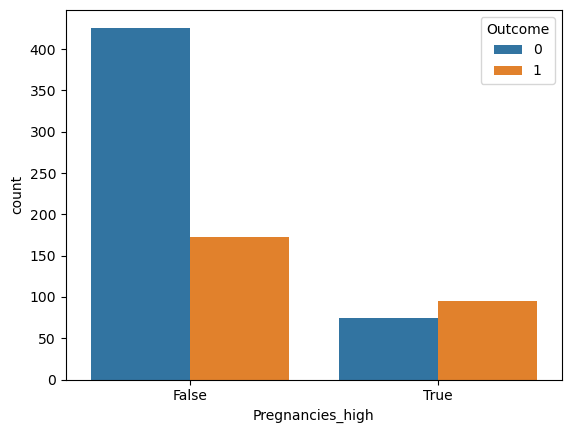

In [21]:
# Pregnancies_high 변수의 빈도수ㅡㄹ countplor 으로 그리고
# Outcome 값에 따라 다른 색상으로 표현

sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

# 8. barplot
* 기본 설정으로 시각화하면 y축에는 평균을 추정해서 그리게 됩니다

<Axes: xlabel='Outcome', ylabel='BMI'>

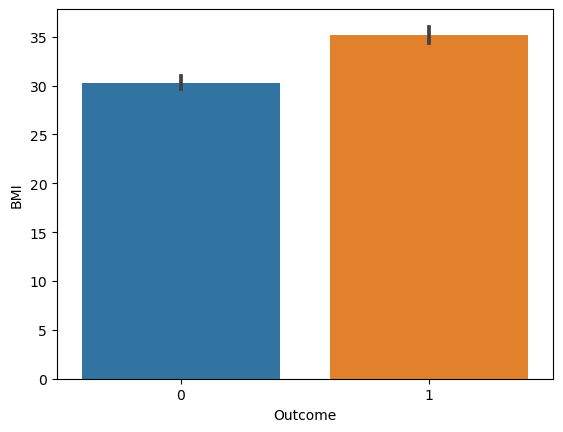

In [22]:
# 당뇨병 발병에 따른 bmi 수치를 비교
sns.barplot(data=df, x='Outcome', y='BMI')

<Axes: xlabel='Outcome', ylabel='Glucose'>

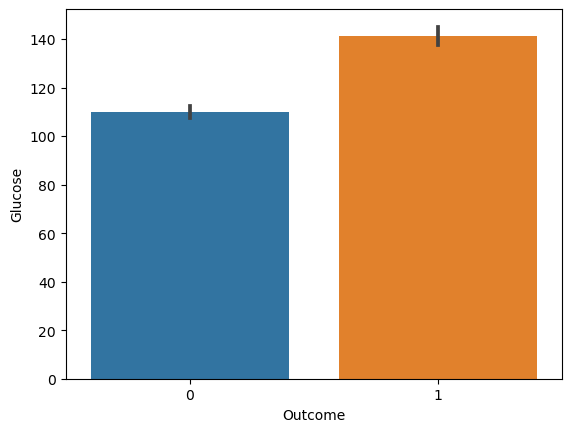

In [23]:
# 당노병 발병에 따른 Glucose 수치를 비교
sns.barplot(data=df, x='Outcome', y='Glucose')

<Axes: xlabel='Outcome', ylabel='Insulin'>

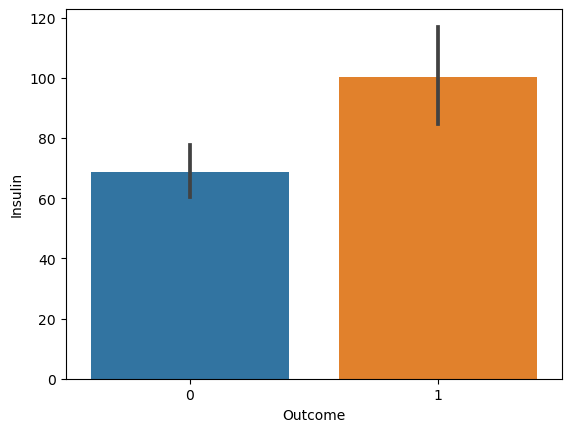

In [24]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병을 비교
sns.barplot(data=df, x='Outcome', y='Insulin')

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

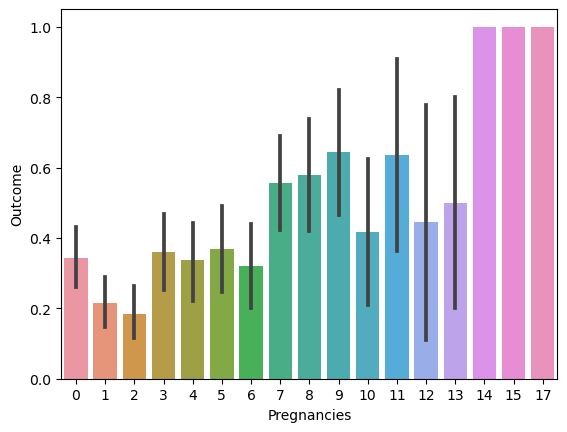

In [25]:
# 임신 횟수에 대해 당뇨병 발병 비율을 비교
sns.barplot(data=df, x='Pregnancies', y='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

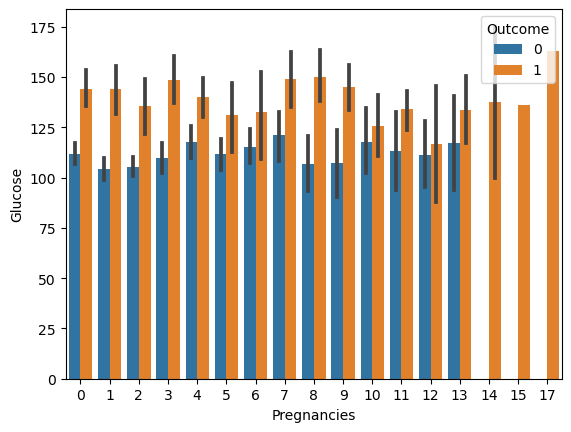

In [26]:
# Pregnancies에 따른 Glucose 수치를 당뇨병 Outcome에 따라 시각화

sns.barplot(data=df, x='Pregnancies', y='Glucose', hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='BMI'>

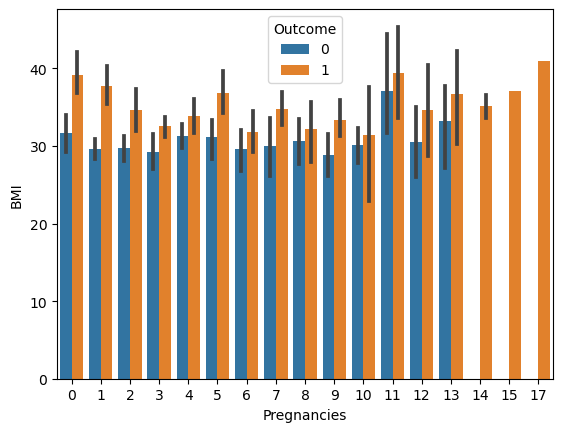

In [27]:
# Pregnancies에 따른 BMI 수치를 당뇨병 Outcome에 따라 시각화
sns.barplot(data=df, x='Pregnancies', y='BMI', hue='Outcome')

# 9. boxplot


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

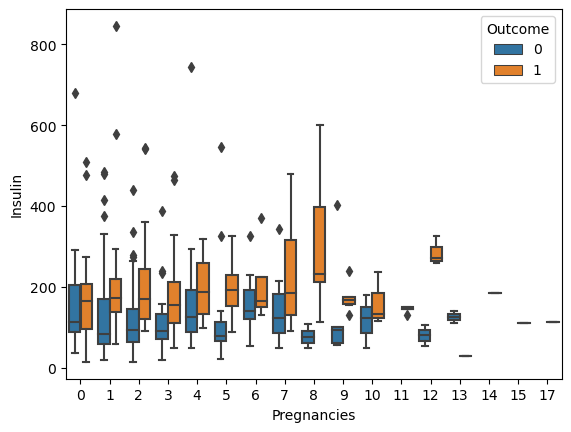

In [29]:
# Pregnancies에 따른 Insulin를 Outcome에 따라 시각화
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 ㅏㄱㅂ셍 대해서만 그린다

sns.boxplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

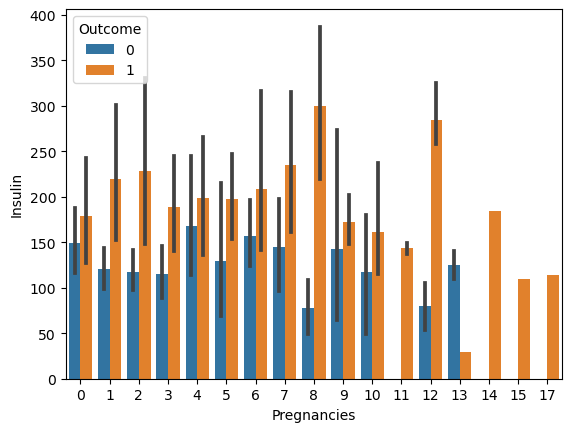

In [30]:
sns.barplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

In [31]:
# 10. violinplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

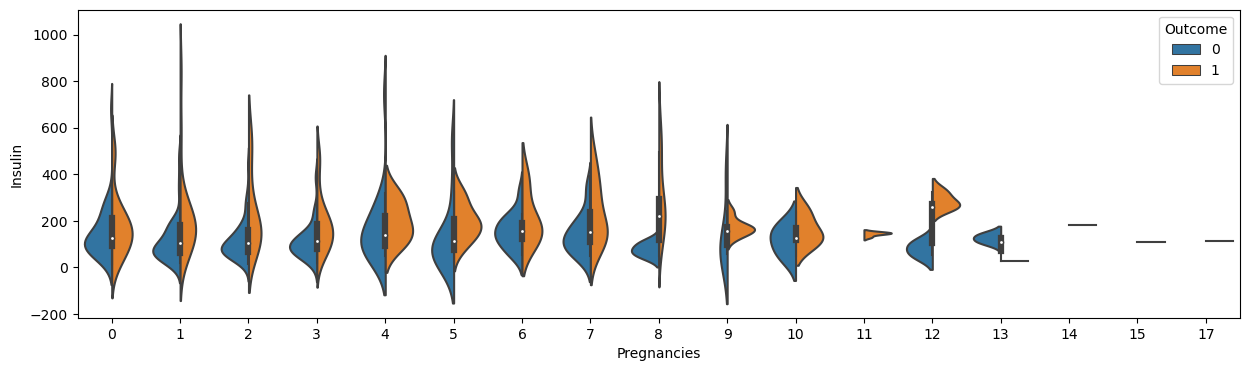

In [32]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome', split=True)

# 11. swarmplot

/Users/yuri/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yuri/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yuri/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

/Users/yuri/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


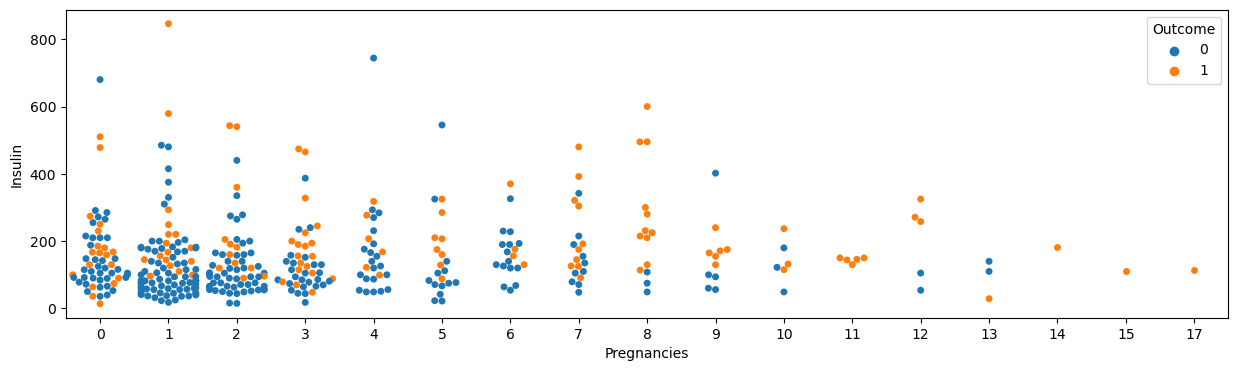

In [34]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

# 12. distplot

In [35]:
df_0 = df[df['Outcome']==0]
df_1 = df[df['Outcome']==1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_14007/3396483089.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Pregnancies'])
/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_14007/3396483089.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Pregnancies']

<Axes: xlabel='Pregnancies', ylabel='Density'>

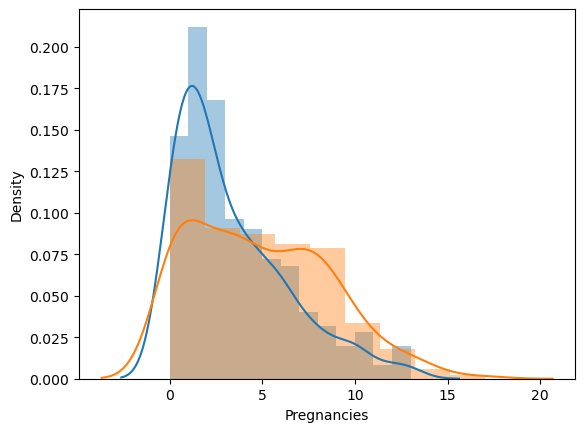

In [36]:
# 임신횟수에 따른 당뇨병 발병 여부 시각화

sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])
# a -> pandas series
# rug -> 표시랄거냐 말거냐

/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_14007/2559158900.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Age'], hist = False, rug=True, label=0)
/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_14007/2559158900.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

<Axes: xlabel='Age', ylabel='Density'>

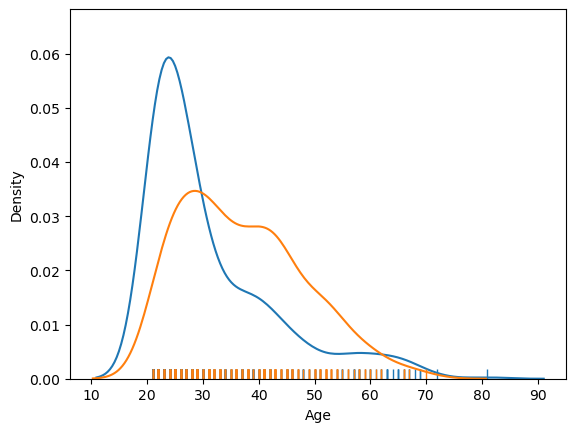

In [37]:
# 나이에 따른 당뇨병 발병 여부 시각화

sns.distplot(df_0['Age'], hist = False, rug=True, label=0)
sns.distplot(df_1['Age'], hist = False, rug=True, label=1)

# 13. sublot


# 13.1 pandas 통한 histplot그리기
* pandas를 사용하면 모든 변수에 대한 서브플롯을 한번에 그려준다

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>],
       [<Axes: title={'center': 'Pregnancies_high'}>, <Axes: >, <Axes: >]],
      dtype=object)

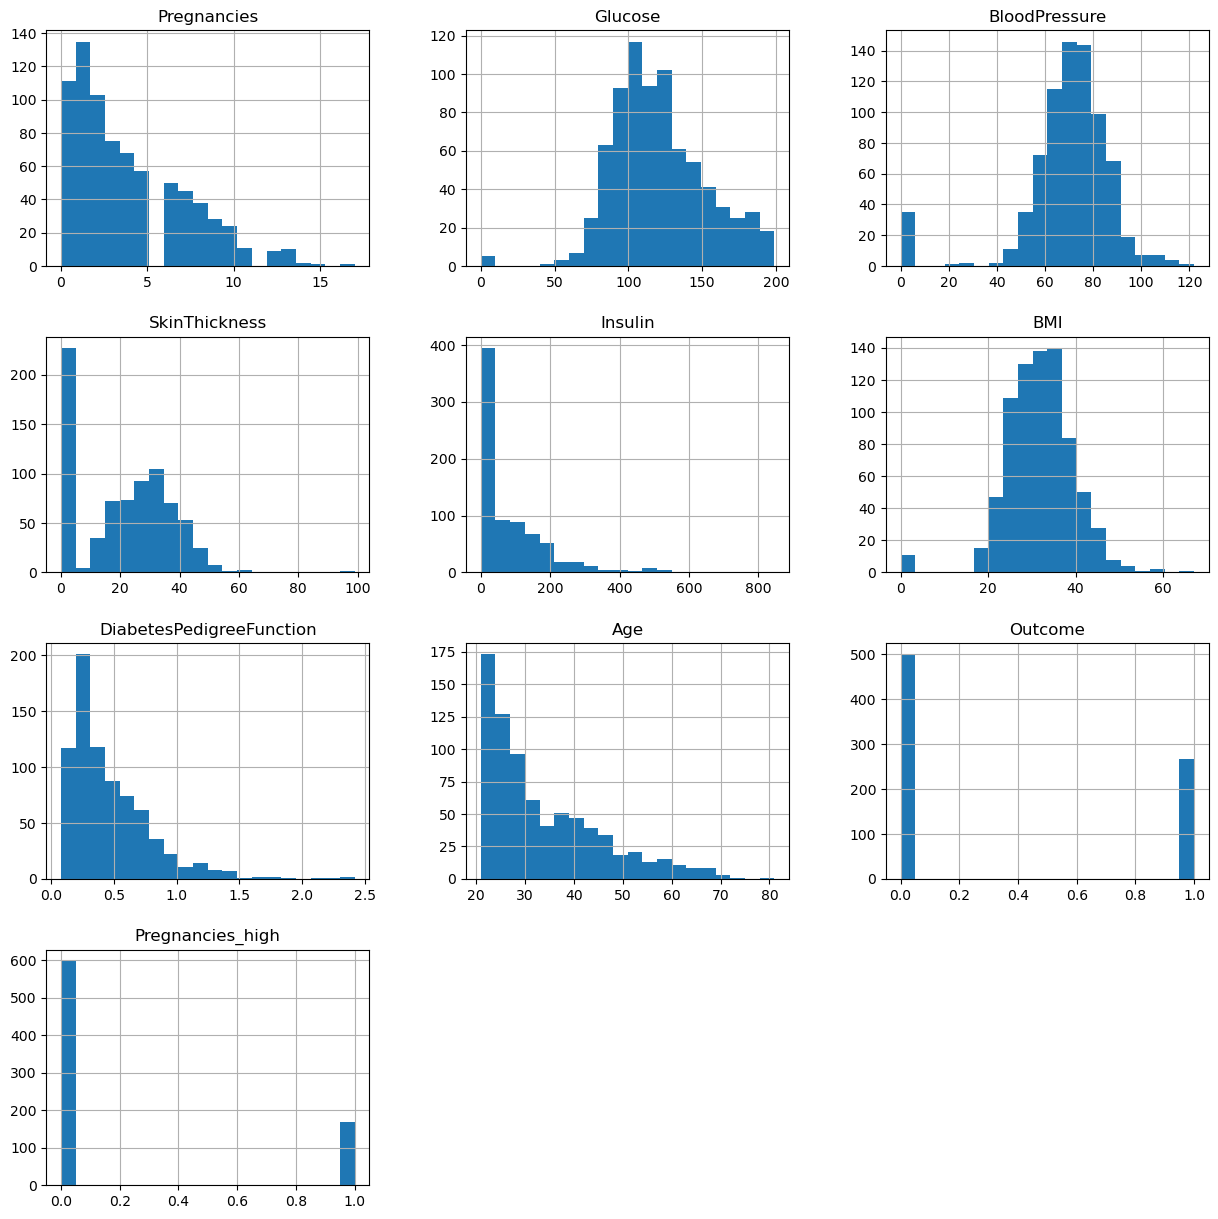

In [38]:
df['Pregnancies_high'] = df['Pregnancies_high'].astype(int)
df
# pregnancies -> 0,1
df.hist(figsize=(15,15), bins=20)

In [39]:
# 13.2 반복문을 통한 서브플롯 그릭ㅣ

In [40]:
# 13.2.1 distplot

In [41]:
# 컬럼의 수 만큼 for문을 만들어서 서브 플롯으로 시각화 

#col_num = df.columns.shape
#col_num

cols = df.columns[:-1].tolist()
cols 
 


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_14007/2872978655.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_14007/2872978655.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_

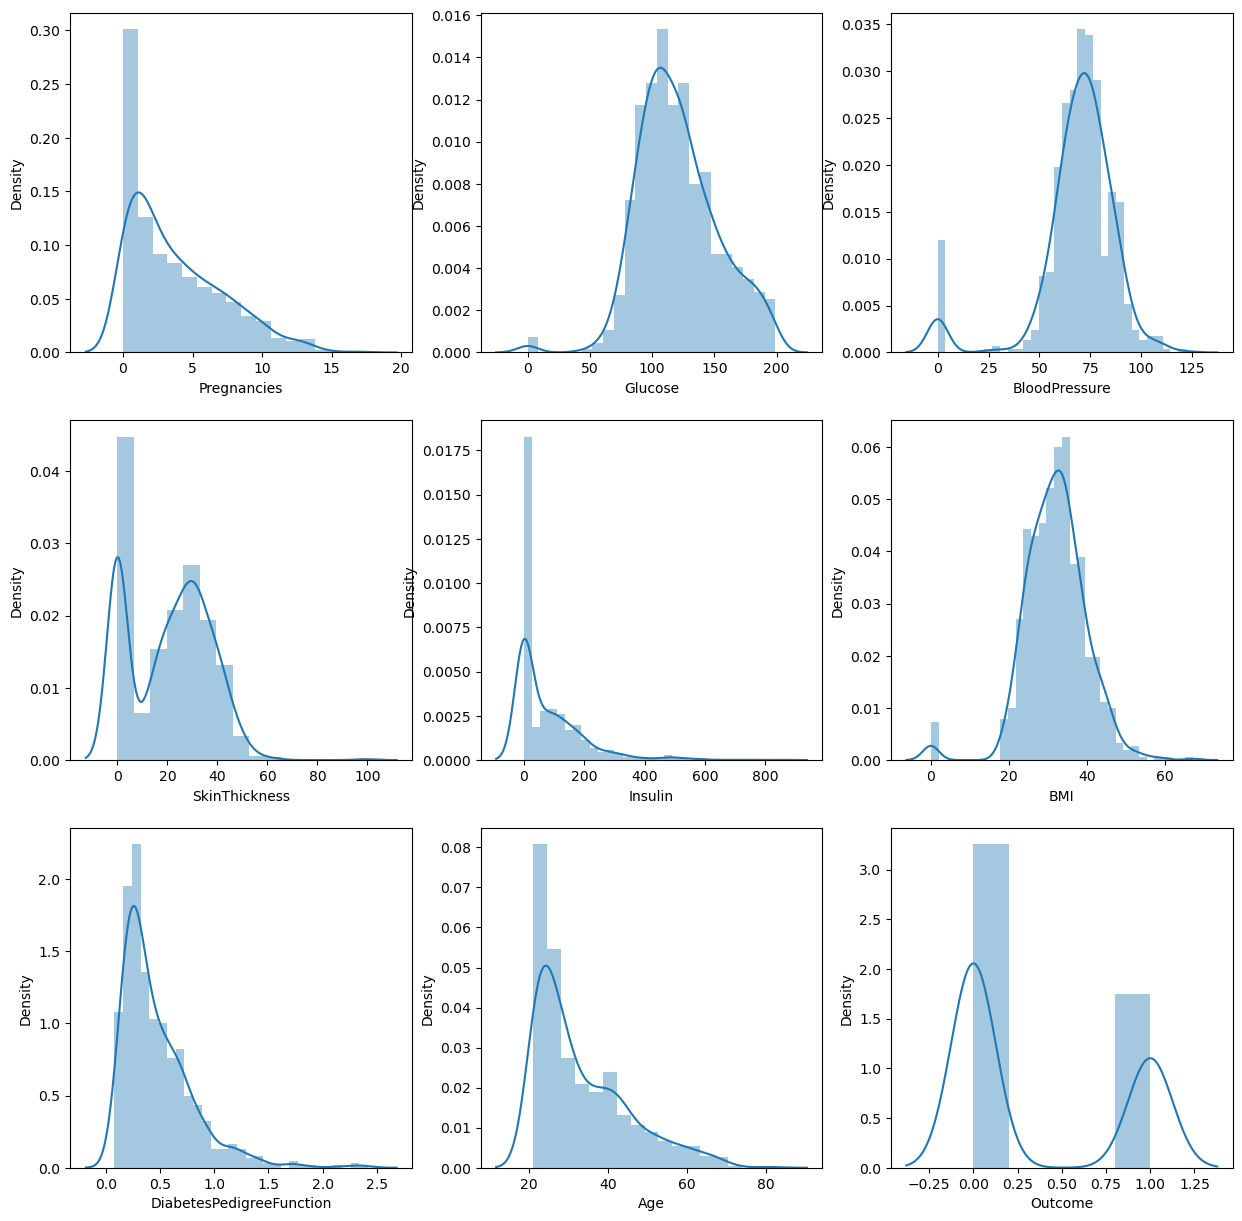

In [42]:
# distplot 으로 서브플롯

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
# 빈 ㄴsubplot
for i, col_name in enumerate(cols) :
    row = i//3
    col = i % 3
    sns.distplot(df[col_name], ax=axes[row][col])
    
    
    
# sns.distplot(df['Outcome'], ax=axes[1][1])

In [43]:
df[df['Outcome']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
1,1,85,66,29,0,26.6,0.351,31,0,0
3,1,89,66,23,94,28.1,0.167,21,0,0
5,5,116,74,0,0,25.6,0.201,30,0,0
7,10,115,0,0,0,35.3,0.134,29,0,1
10,4,110,92,0,0,37.6,0.191,30,0,0
...,...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0,1
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0


In [44]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_14007/3321546892.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_14007/3321546892.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[

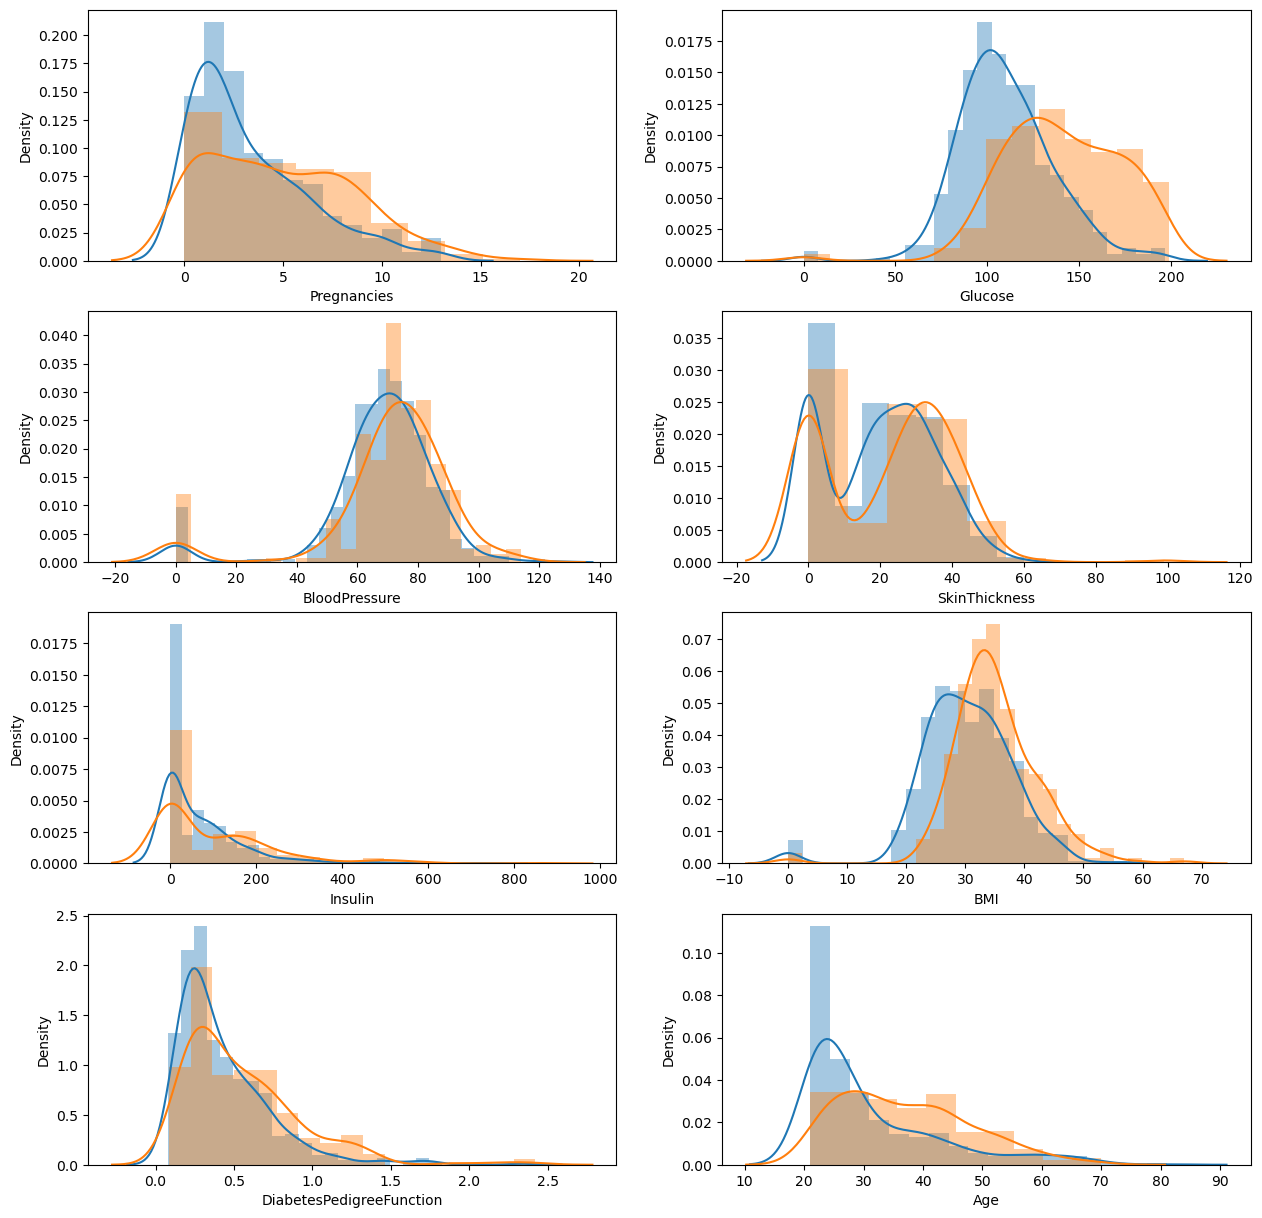

In [45]:
# 모든 변수에 대한 distplot 을 그려본다

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
# 빈 ㄴsubplot
for i, col_name in enumerate(cols[:-1]) :
    row = i//2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])
    

In [46]:
# 13.2.2 violinplot

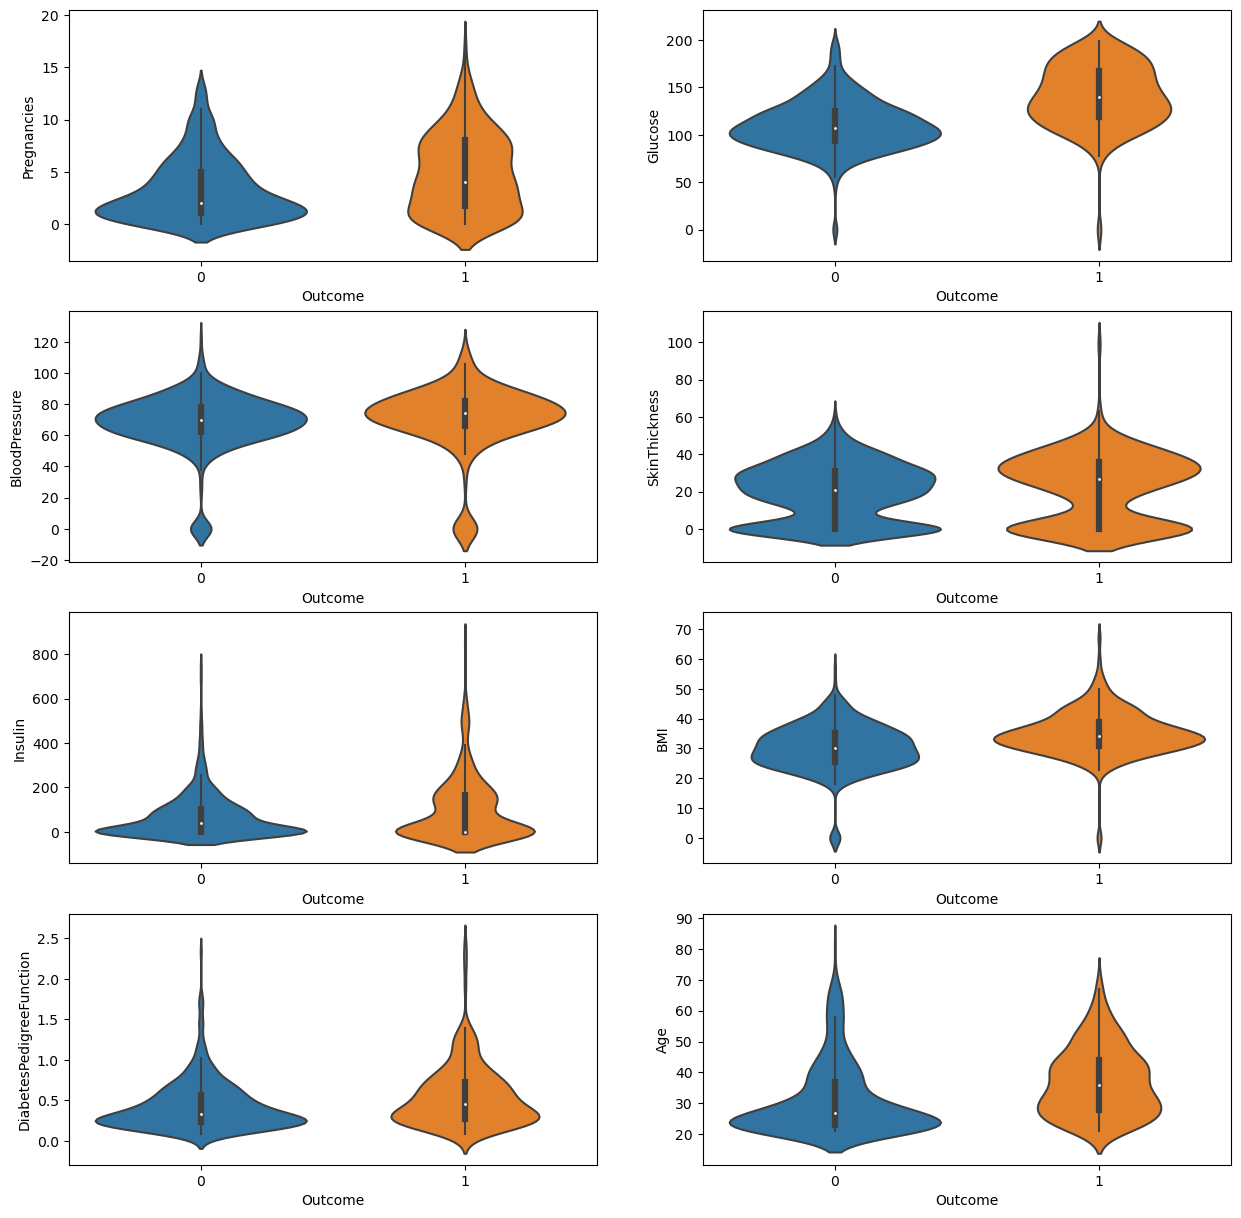

In [47]:
# violinplot 으로 서브플롯을 그려본다

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
# 빈 ㄴsubplot
for i, col_name in enumerate(cols[:-1]) :
    row = i//2
    col = i % 2
    sns.violinplot(data=df, x='Outcome', y=col_name, ax=axes[row][col])

# 13.2.3 implot
* 상관계수가 높은 두 변수에 대해 시각화


/Users/yuri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


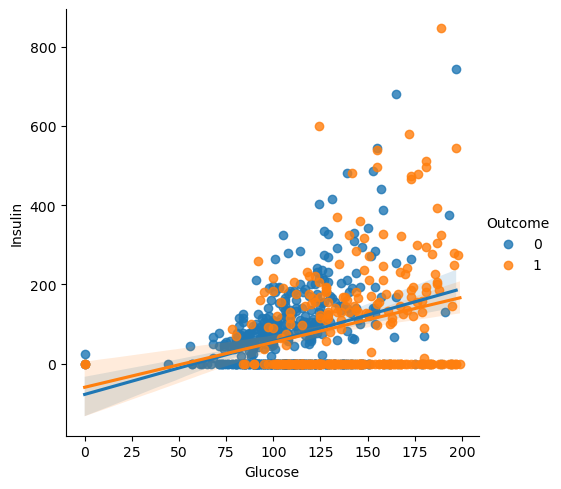

In [48]:
# Glucose와 Insulin 을 Outcome으로 구분
sns.lmplot(data=df, x='Glucose', y='Insulin', hue='Outcome')


/Users/yuri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


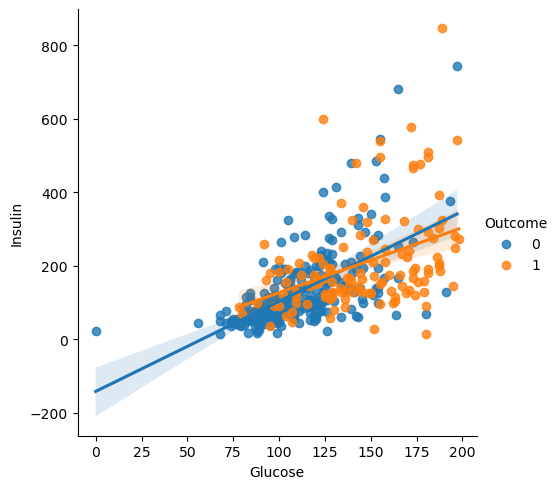

In [49]:
# Insulin 수치가 0 이상인 데이터로만 그려본다

sns.lmplot(data=df[df['Insulin']>0], x='Glucose', y='Insulin', hue='Outcome')

# 13.2.4 pairplot

/Users/yuri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


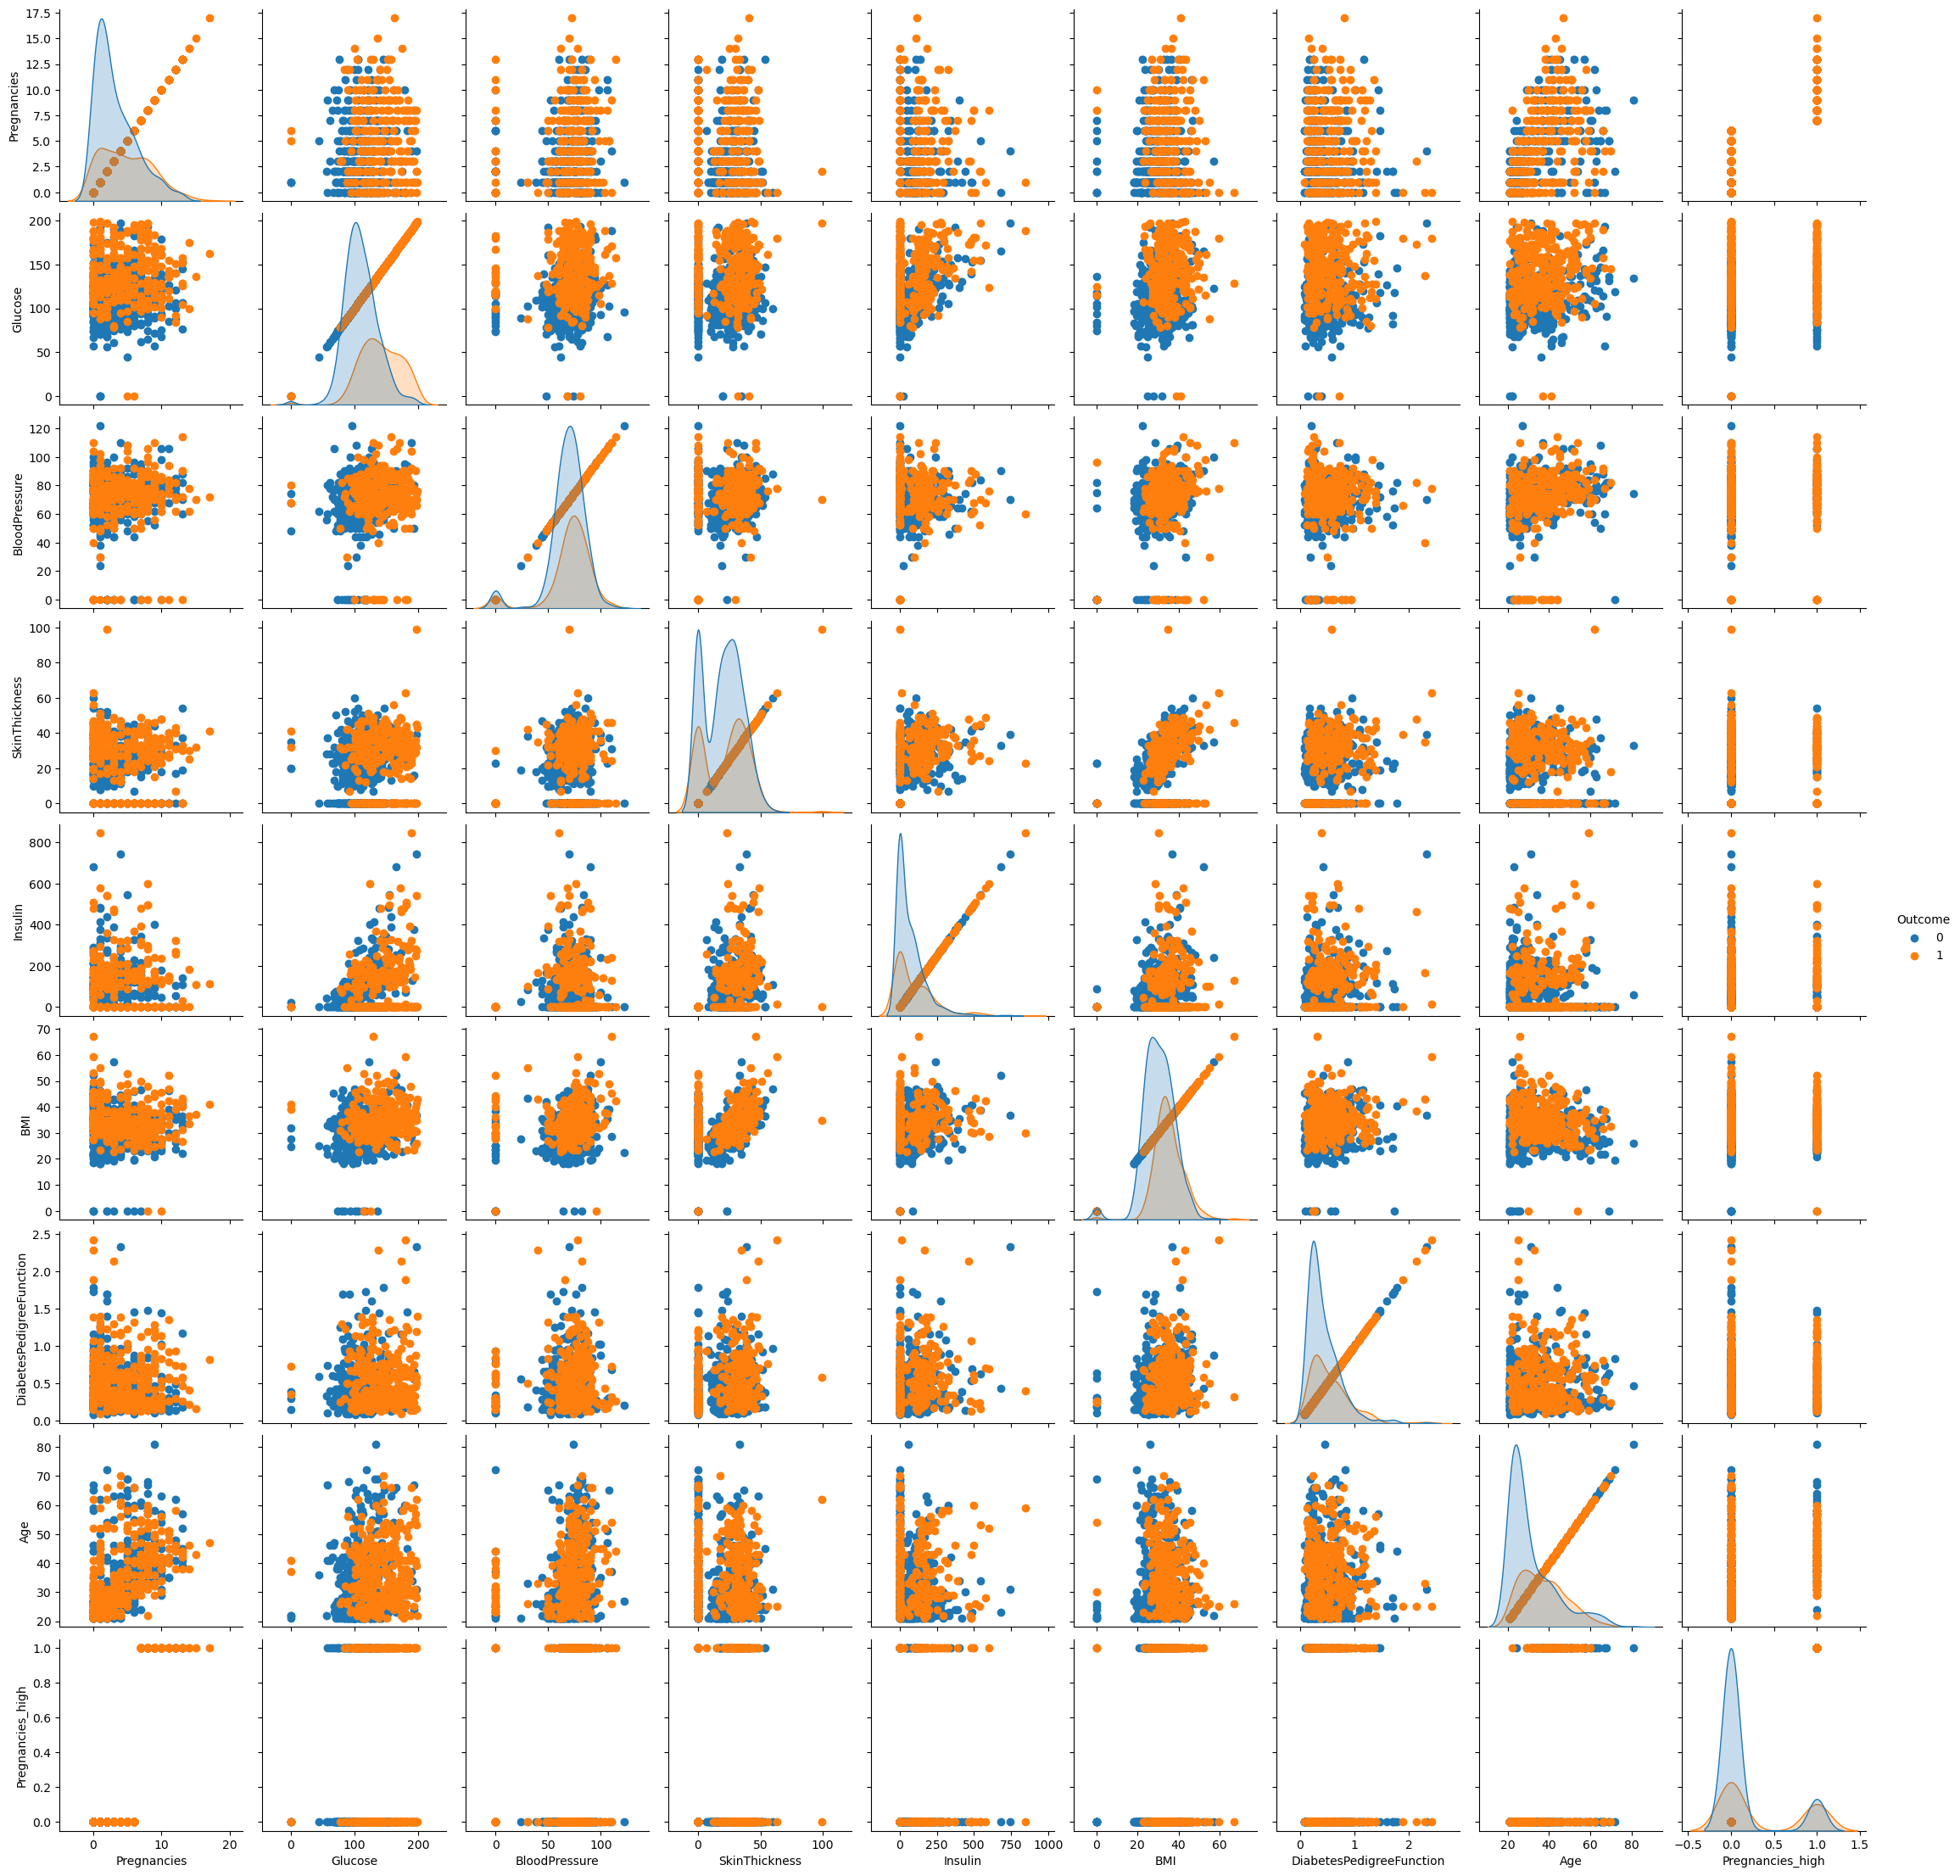

In [50]:
# PairGrid를 통해 모든 변수에 대해 Outcome에  따른 scatterplot을 그려본다

g = sns.pairplot(df, hue='Outcome')
g.map(plt.scatter)

# 14. 상관 분석

In [56]:
df_matrix = df.iloc[:,:-2].replace(0,np.nan)
df_matrix['Otcome'] = df["Outcome"]
df_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Otcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [67]:
# 정답 값인 Outcome을 제외하고 feature로 사용할 컬럼들에 대해 0을 결측치로 만들어 준다
# 상관계수를 구한다

df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Otcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Otcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<Axes: >

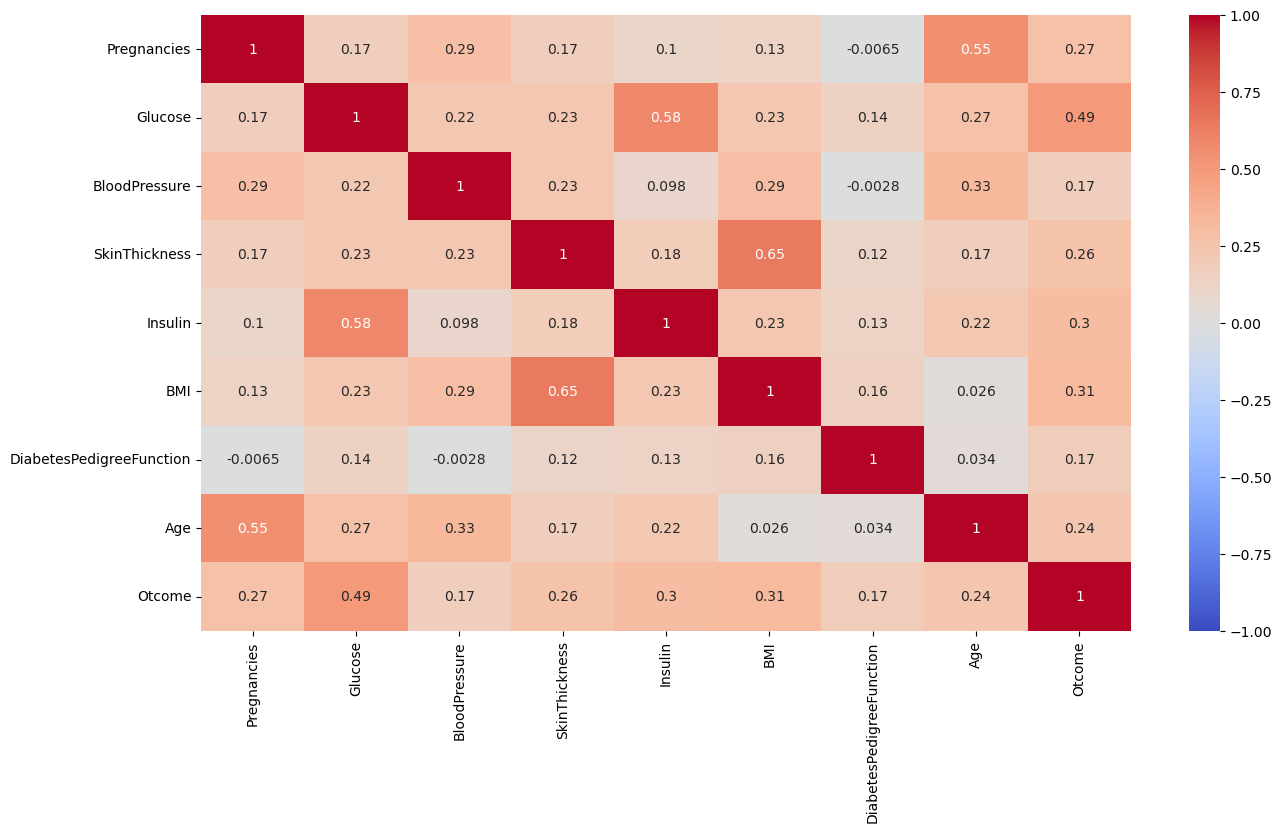

In [69]:
# 위에서 수한 상관계수를 heatmap으로 시각화
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')

In [78]:
# Outcome 수치에 대한 상관계수만 모아서 본다

df_corr['Otcome']

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Otcome                      1.000000
Name: Otcome, dtype: float64

# 14.1 상관계수가 높은 변수끼리 보기

<Axes: xlabel='Insulin', ylabel='Glucose'>

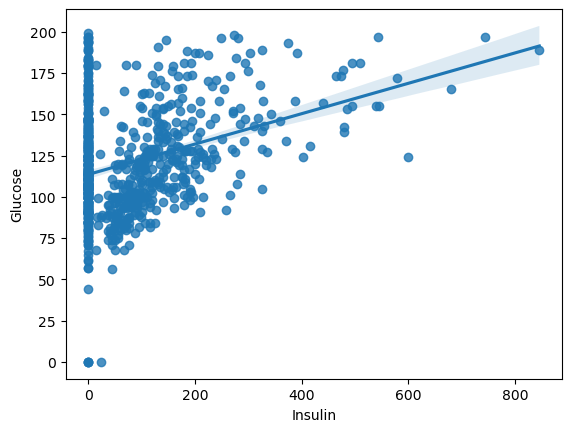

In [72]:
sns.regplot(data=df, x='Insulin', y='Glucose')

<Axes: xlabel='Insulin', ylabel='Glucose'>

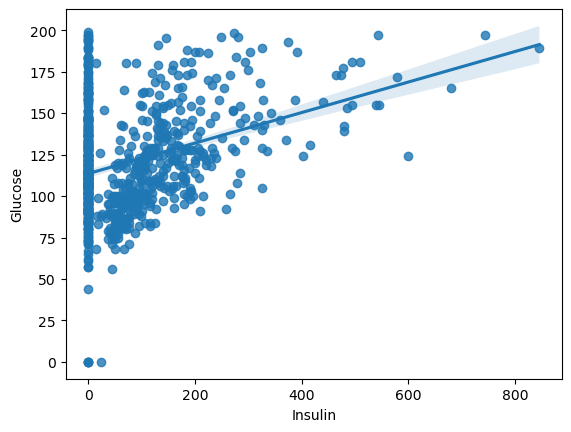

In [73]:
# Insulin 과 Glucose 로 replot그리기

sns.regplot(data=df, x='Insulin', y='Glucose')

<Axes: xlabel='Insulin', ylabel='Glucose'>

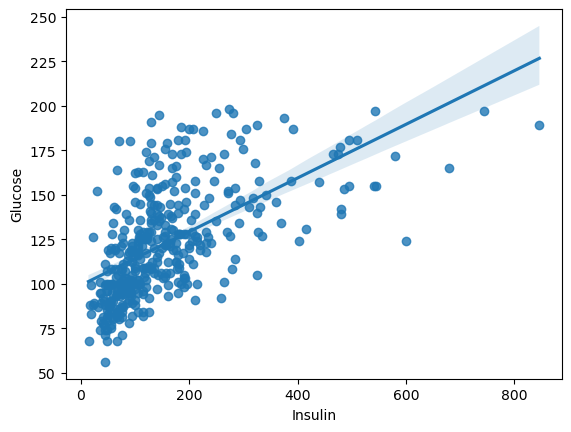

In [74]:
# df_0 으로 결측치 처리한 데이터프레임으로
# Insulin 과 Glucose로 regplot 그리기
sns.regplot(data=df_matrix, x='Insulin', y='Glucose')


<Axes: xlabel='Age', ylabel='Pregnancies'>

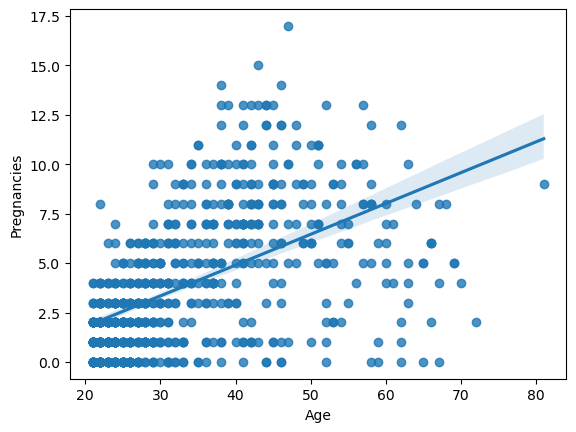

In [75]:
# Age, Pregnancies - regplot
sns.regplot(data=df, x='Age', y='Pregnancies')

/Users/yuri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


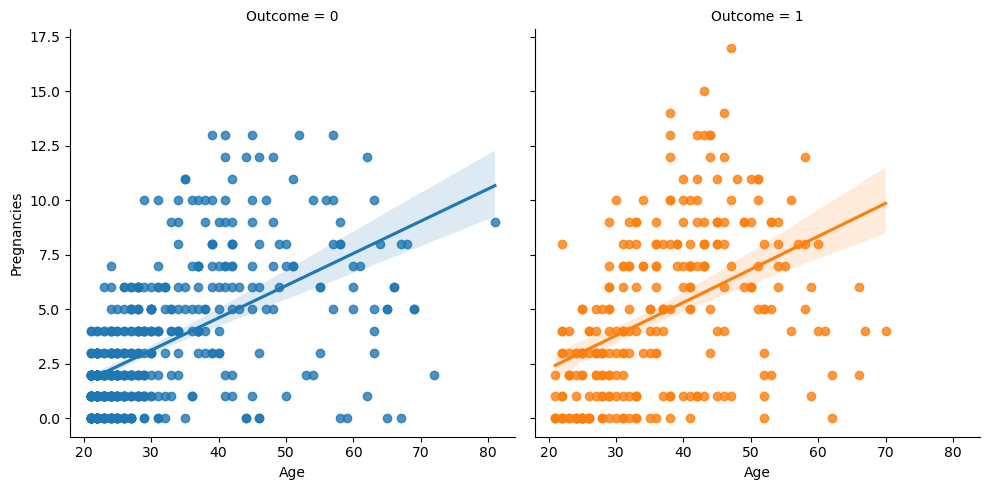

In [77]:
# Age & Pregnancies -> lmplot
# Outcome에 따라 다른 색상

sns.lmplot(data=df, x='Age', y='Pregnancies', hue='Outcome', col='Outcome')